### Step 1: Mount the Google Drive

Remember to use GPU runtime before mounting your account. (Runtime --> Change runtime type).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 2: Open the project directory

Replace `Your_Dir` with your own path.

In [9]:
cd /content/drive/MyDrive/emg2qwerty-main

/content/drive/MyDrive/emg2qwerty-main


### Step 3: Install required packages

After installing them, Colab will require you to restart the session.

In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/stepanhruda/camel-kenlm.git (to revision a6e906b2b30497dd999cb9c84c42c5111f8616e0) to /tmp/pip-req-build-vj4i5ahf
  Running command git clone --filter=blob:none --quiet https://github.com/stepanhruda/camel-kenlm.git /tmp/pip-req-build-vj4i5ahf
  Running command git rev-parse -q --verify 'sha^a6e906b2b30497dd999cb9c84c42c5111f8616e0'
  Running command git fetch -q https://github.com/stepanhruda/camel-kenlm.git a6e906b2b30497dd999cb9c84c42c5111f8616e0
  Running command git checkout -q a6e906b2b30497dd999cb9c84c42c5111f8616e0
  Resolved https://github.com/stepanhruda/camel-kenlm.git to commit a6e906b2b30497dd999cb9c84c42c5111f8616e0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


### Step 4: Start your experiments!

- Remember to download the dataset here: `Your_Dir/emg2qwerty-main/data`.
- You may now start your experiments with any scripts.
- Below is an example of single-user training.

In [ ]:
!python -m emg2qwerty.train \
  user="single_user" \
  trainer.accelerator=gpu trainer.devices=1 \
  #--multirun

2025-03-13 10:27:58.498554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741861678.521674  186229 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741861678.528834  186229 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[2025-03-13 10:28:03,574][__main__][INFO] - 
Config:
user: single_user
dataset:
  train:
  - user: 89335547
    session: 2021-06-03-1622765527-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f
  - user: 89335547
    session: 2021-06-02-1622681518-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f
  - user: 89335547
    session: 2021-06-04-1622863166-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f
  - us

# Plots in the reports

In [ ]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

## test CER vs Sampling Rate

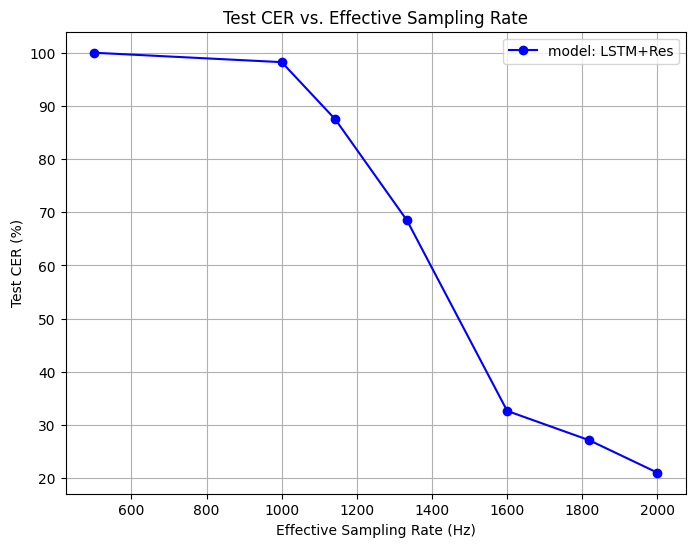

In [ ]:
factors = np.array([2, 4, 1.5, 1.25, 1.1, 1.75, 1])
test_cer1 = np.array([98.22779, 100, 68.467689, 32.634536, 27.123405, 87.4432678, 21.00713])

original_rate = 2000
sampling_rates = original_rate / factors

sorted_indices = np.argsort(sampling_rates)
sampling_rates_sorted = sampling_rates[sorted_indices]
test_cer_sorted = test_cer1[sorted_indices]

plt.figure(figsize=(8, 6))
plt.plot(sampling_rates_sorted, test_cer_sorted, marker='o', linestyle='-', color='b', label='model: LSTM+Res')
plt.xlabel('Effective Sampling Rate (Hz)')
plt.ylabel('Test CER (%)')
plt.title('Test CER vs. Effective Sampling Rate')
plt.grid(True)
plt.legend()
plt.show()

## test CER with different data augmentation techniques

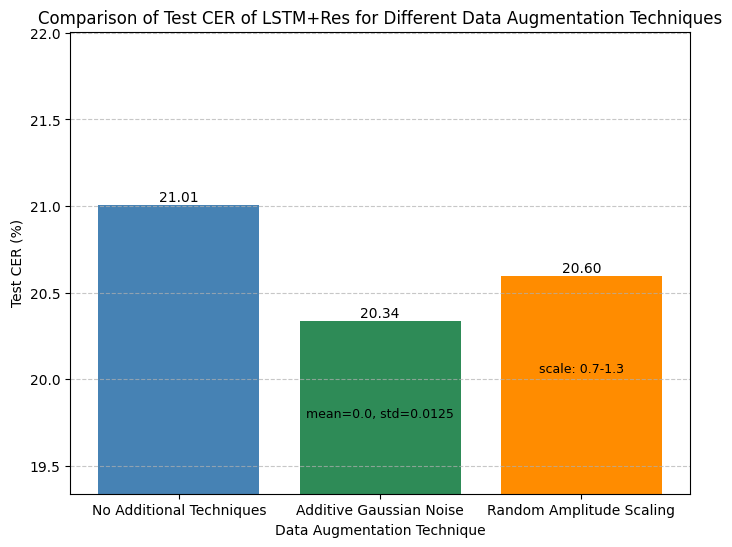

In [ ]:
labels = ["No Additional Techniques", "Additive Gaussian Noise", "Random Amplitude Scaling"]
test_cer2 = [21.00713, 20.33715, 20.596498]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, test_cer2, color=['steelblue', 'seagreen', 'darkorange'])

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

    if labels[i] == "Additive Gaussian Noise":
        extra_text = "mean=0.0, std=0.0125"
    elif labels[i] == "Random Amplitude Scaling":
        extra_text = "scale: 0.7-1.3"
    else:
        extra_text = ""

    if extra_text:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height - 0.5,
            extra_text,
            ha='center',
            va='top',
            fontsize=9,
            color='black'
        )

plt.xlabel("Data Augmentation Technique")
plt.ylabel("Test CER (%)")
plt.title("Comparison of Test CER of LSTM+Res for Different Data Augmentation Techniques")
plt.ylim(min(test_cer2) - 1, max(test_cer2) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## test CER vs number of channels

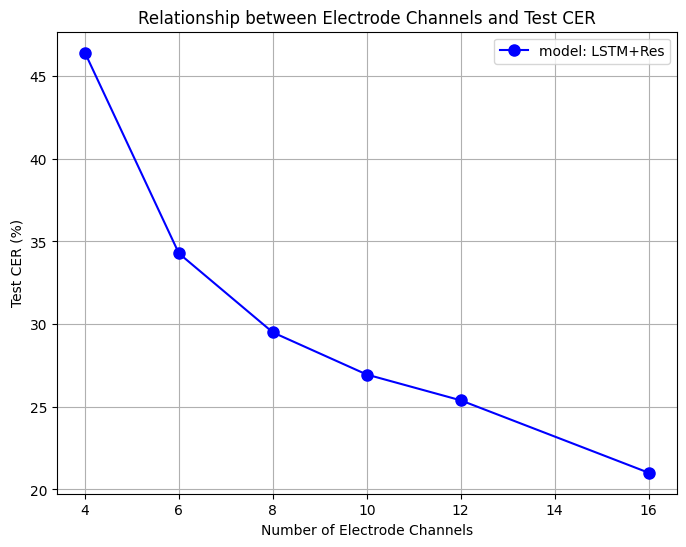

In [ ]:
num_channels = np.array([16, 12, 10, 8, 6, 4])
test_cer3 = np.array([21.01, 25.39, 26.95, 29.50, 34.28, 46.42])

plt.figure(figsize=(8, 6))
plt.plot(num_channels, test_cer3, marker='o', markersize=8, linestyle='-', color='b', label='model: LSTM+Res')
plt.xlabel('Number of Electrode Channels')
plt.ylabel('Test CER (%)')
plt.title('Relationship between Electrode Channels and Test CER')
plt.grid(True)
plt.legend()
plt.show()


## train/val CER w.r.t epoch for different models

In [ ]:
# LSTMCTC
event_file_path_lstmctc = "/content/drive/MyDrive/emg2qwerty-main/logs/2025-03-13/03-59-34/lightning_logs/version_0/events.out.tfevents.1741838375.4a2a13963ee2"

# LSTMCTC + data aug
event_file_path_lstmctc_data_aug = "/content/drive/MyDrive/emg2qwerty-main/logs/2025-03-13/06-07-23/lightning_logs/version_0/events.out.tfevents.1741846044.4a2a13963ee2"

# Baseline
event_file_path_baseline = "/content/drive/MyDrive/emg2qwerty-main/logs/2025-03-13/10-28-03/lightning_logs/version_0/events.out.tfevents.1741861684.4a2a13963ee2"

# CNN Trans
event_file_path_cnntrans = "/content/drive/MyDrive/emg2qwerty-main/logs/2025-03-13/07-49-27/lightning_logs/version_0/events.out.tfevents.1741852168.4a2a13963ee2"

# LSTM
event_file_path_lstm = '/content/drive/MyDrive/emg2qwerty-main/logs/2025-03-13/00-25-28/lightning_logs/version_0/events.out.tfevents.1741825529.4a2a13963ee2'

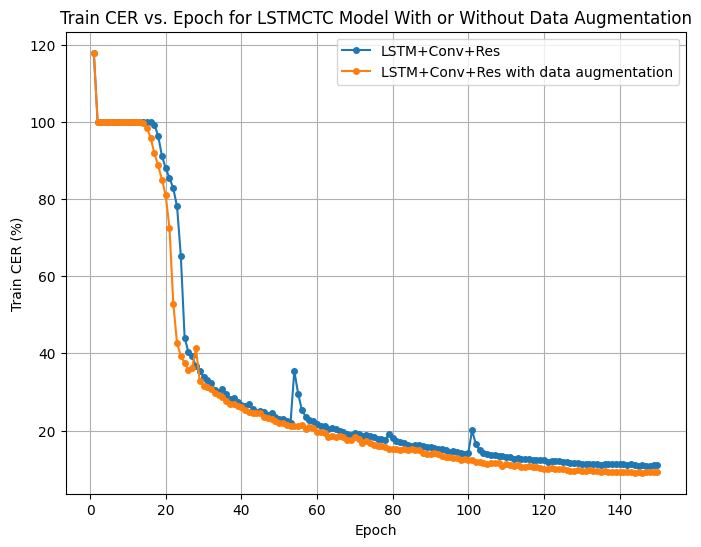

In [ ]:
# LSTMCTC + data aug (Train CER)
ea_lstmctc_data_aug = EventAccumulator(event_file_path_lstmctc_data_aug)
ea_lstmctc_data_aug.Reload()
lstmctc_data_aug_train_events = ea_lstmctc_data_aug.Scalars('train/CER')
lstmctc_data_aug_train_values = [event.value for event in lstmctc_data_aug_train_events]
lstmctc_data_aug_train_epochs = np.arange(1, len(lstmctc_data_aug_train_values) + 1)

# LSTMCTC (Train CER)
ea_lstmctc = EventAccumulator(event_file_path_lstmctc)
ea_lstmctc.Reload()
lstmctc_train_events = ea_lstmctc.Scalars('train/CER')
lstmctc_train_values = [event.value for event in lstmctc_train_events]
lstmctc_train_epochs = np.arange(1, len(lstmctc_train_values) + 1)

plt.figure(figsize=(8, 6))
plt.plot(lstmctc_train_epochs, lstmctc_train_values, marker='o', markersize=4, label='LSTM+Conv+Res')
plt.plot(lstmctc_data_aug_train_epochs, lstmctc_data_aug_train_values, marker='o', markersize=4, label='LSTM+Conv+Res with data augmentation')
plt.xlabel('Epoch')
plt.ylabel('Train CER (%)')
plt.title('Train CER vs. Epoch for LSTMCTC Model With or Without Data Augmentation')
plt.grid(True)
plt.legend()
plt.show()

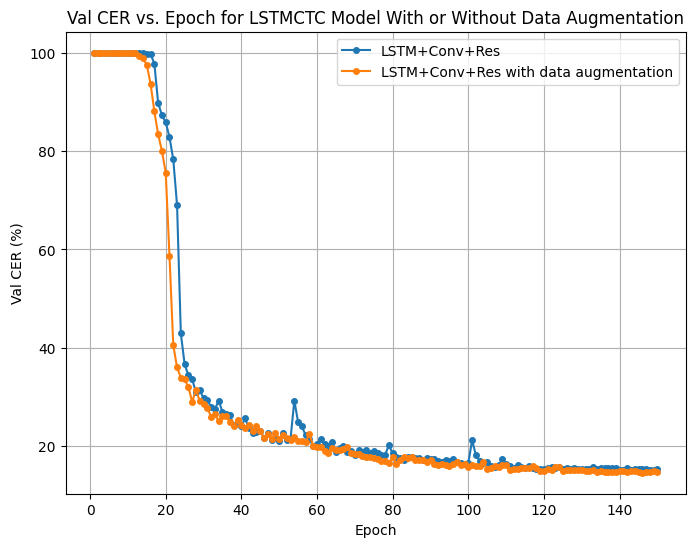

In [ ]:
# LSTMCTC + data aug (Val CER)
ea_lstmctc_data_aug = EventAccumulator(event_file_path_lstmctc_data_aug)
ea_lstmctc_data_aug.Reload()
lstmctc_data_aug_val_events = ea_lstmctc_data_aug.Scalars('val/CER')
lstmctc_data_aug_val_values = [event.value for event in lstmctc_data_aug_val_events]
lstmctc_data_aug_val_epochs = np.arange(1, len(lstmctc_data_aug_val_values) + 1)

# LSTMCTC (Val CER)
ea_lstmctc = EventAccumulator(event_file_path_lstmctc)
ea_lstmctc.Reload()
lstmctc_val_events = ea_lstmctc.Scalars('val/CER')
lstmctc_val_values = [event.value for event in lstmctc_val_events]
lstmctc_val_epochs = np.arange(1, len(lstmctc_val_values) + 1)

plt.figure(figsize=(8, 6))
plt.plot(lstmctc_val_epochs, lstmctc_val_values, marker='o', markersize=4, label='LSTM+Conv+Res')
plt.plot(lstmctc_data_aug_val_epochs, lstmctc_data_aug_val_values, marker='o', markersize=4, label='LSTM+Conv+Res with data augmentation')
plt.xlabel('Epoch')
plt.ylabel('Val CER (%)')
plt.title('Val CER vs. Epoch for LSTMCTC Model With or Without Data Augmentation')
plt.grid(True)
plt.legend()
plt.show()


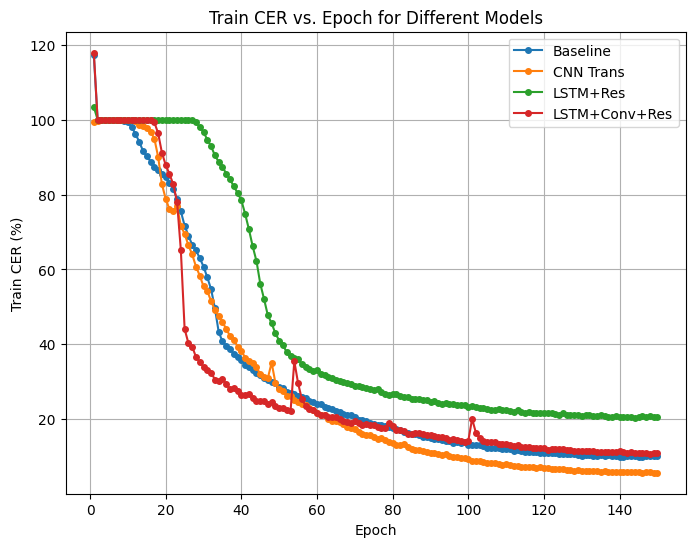

In [ ]:
# LSTM (Train CER)
ea_lstm = EventAccumulator(event_file_path_lstm)
ea_lstm.Reload()
lstm_train_events = ea_lstm.Scalars('train/CER')
lstm_train_values = [event.value for event in lstm_train_events]
lstm_train_epochs = np.arange(1, len(lstm_train_values) + 1)

# LSTMCTC (Train CER)
ea_lstmctc = EventAccumulator(event_file_path_lstmctc)
ea_lstmctc.Reload()
lstmctc_train_events = ea_lstmctc.Scalars('train/CER')
lstmctc_train_values = [event.value for event in lstmctc_train_events]
lstmctc_train_epochs = np.arange(1, len(lstmctc_train_values) + 1)

# CNN Trans (Train CER)
ea_cnntrans = EventAccumulator(event_file_path_cnntrans)
ea_cnntrans.Reload()
cnntrans_train_events = ea_cnntrans.Scalars('train/CER')
cnntrans_train_values = [event.value for event in cnntrans_train_events]
cnntrans_train_epochs = np.arange(1, len(cnntrans_train_values) + 1)

# Baseline (Train CER)
ea_baseline = EventAccumulator(event_file_path_baseline)
ea_baseline.Reload()
baseline_train_events = ea_baseline.Scalars('train/CER')
baseline_train_values = [event.value for event in baseline_train_events]
baseline_train_epochs = np.arange(1, len(baseline_train_values) + 1)

plt.figure(figsize=(8, 6))
plt.plot(baseline_train_epochs, baseline_train_values, marker='o', markersize=4, label='Baseline')
plt.plot(cnntrans_train_epochs, cnntrans_train_values, marker='o', markersize=4, label='CNN Trans')
plt.plot(lstm_train_epochs, lstm_train_values, marker='o', markersize=4, label='LSTM+Res')
plt.plot(lstmctc_train_epochs, lstmctc_train_values, marker='o', markersize=4, label='LSTM+Conv+Res')
plt.xlabel('Epoch')
plt.ylabel('Train CER (%)')
plt.title('Train CER vs. Epoch for Different Models')
plt.grid(True)
plt.legend()
plt.show()

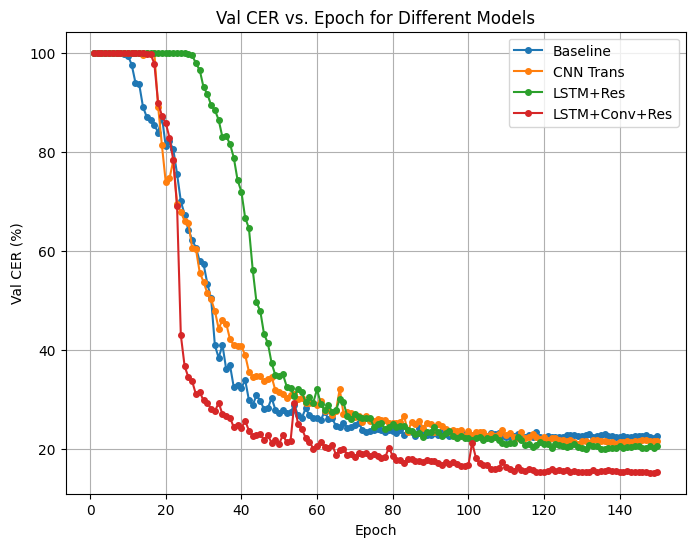

In [ ]:
# LSTM (Val CER)
ea_lstm = EventAccumulator(event_file_path_lstm)
ea_lstm.Reload()
lstm_val_events = ea_lstm.Scalars('val/CER')
lstm_val_values = [event.value for event in lstm_val_events]
lstm_val_epochs = np.arange(1, len(lstm_val_values) + 1)

# LSTMCTC (Val CER)
ea_lstmctc = EventAccumulator(event_file_path_lstmctc)
ea_lstmctc.Reload()
lstmctc_val_events = ea_lstmctc.Scalars('val/CER')
lstmctc_val_values = [event.value for event in lstmctc_val_events]
lstmctc_val_epochs = np.arange(1, len(lstmctc_val_values) + 1)

# CNN Trans (Val CER)
ea_cnntrans = EventAccumulator(event_file_path_cnntrans)
ea_cnntrans.Reload()
cnntrans_val_events = ea_cnntrans.Scalars('val/CER')
cnntrans_val_values = [event.value for event in cnntrans_val_events]
cnntrans_val_epochs = np.arange(1, len(cnntrans_val_values) + 1)

# Baseline (Val CER)
ea_baseline = EventAccumulator(event_file_path_baseline)
ea_baseline.Reload()
baseline_val_events = ea_baseline.Scalars('val/CER')
baseline_val_values = [event.value for event in baseline_val_events]
baseline_val_epochs = np.arange(1, len(baseline_val_values) + 1)

plt.figure(figsize=(8, 6))
plt.plot(baseline_val_epochs, baseline_val_values, marker='o', markersize=4, label='Baseline')
plt.plot(cnntrans_val_epochs, cnntrans_val_values, marker='o', markersize=4, label='CNN Trans')
plt.plot(lstm_val_epochs, lstm_val_values, marker='o', markersize=4, label='LSTM+Res')
plt.plot(lstmctc_val_epochs, lstmctc_val_values, marker='o', markersize=4, label='LSTM+Conv+Res')
plt.xlabel('Epoch')
plt.ylabel('Val CER (%)')
plt.title('Val CER vs. Epoch for Different Models')
plt.grid(True)
plt.legend()
plt.show()


## test CER for different models

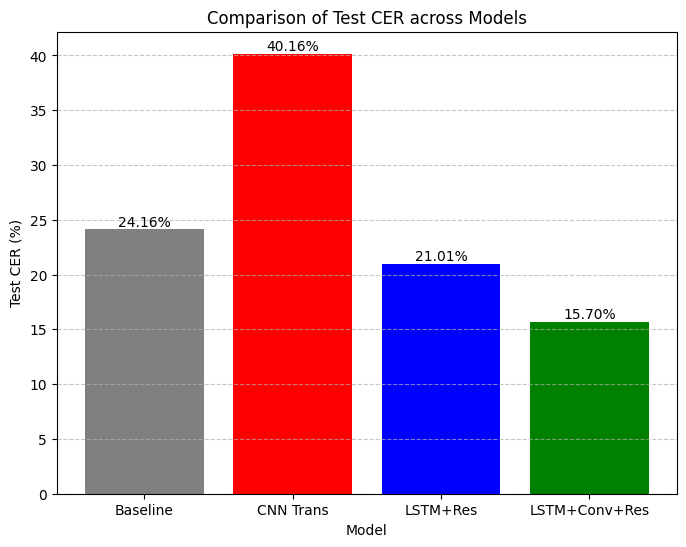

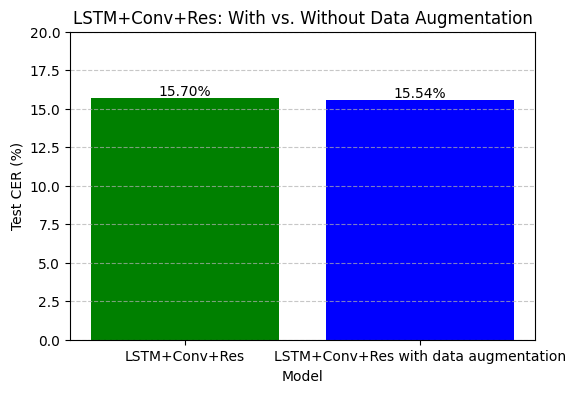

In [ ]:
model_cer = {
    "Baseline": 24.16,
    "CNN Trans": 40.16,
    "LSTM+Res": 21.01,
    "LSTM+Conv+Res": 15.70,
    "LSTM+Conv+Res with data augmentation": 15.54
}

# four models
models = list(model_cer.keys())
cer_values = list(model_cer.values())

plt.figure(figsize=(8, 6))
bars = plt.bar(models[:4], cer_values[:4], color=['gray', 'red', 'blue', 'green'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", ha='center', va='bottom')

plt.xlabel("Model")
plt.ylabel("Test CER (%)")
plt.title("Comparison of Test CER across Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# with vs. without data aug
models_lstm_conv = ["LSTM+Conv+Res", "LSTM+Conv+Res with data augmentation"]
cer_values_lstm_conv = [model_cer[m] for m in models_lstm_conv]

plt.figure(figsize=(6, 4))
bars = plt.bar(models_lstm_conv, cer_values_lstm_conv, color=['green', 'blue'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", ha='center', va='bottom')
plt.xlabel("Model")
plt.ylabel("Test CER (%)")
plt.title("LSTM+Conv+Res: With vs. Without Data Augmentation")
plt.ylim(0, 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()